# Dataset Exploration

The dataset contains career statistics of baseball players. Each dataum has the name of player(`name`), `handednes`(**L** for Left and **R** for Right), `height` (in inchs) amd `weight` (in lbs), `avg`(Career average) and `HR` (Total Home runs). Body metrics include `height` and `weight` while perfomance is given by `HR` and `avg`.

## Questions to explore:
* Is there a correlation between body metrics and performance(avg or HR)?
* Can you identify high avg/HR players from body metrics ? 


# Data loading and summary

In [1]:
import csv
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [2]:
baseball_lst=[]
with open("baseball_data.csv") as f:
    records = csv.DictReader(f)
    for row in records:
        baseball_lst.append(row)
baseball = pd.read_csv('baseball_data.csv')

# Checking for missing values in each column
for key in baseball.keys():
    if baseball[key].isnull().sum():
        print (key)

In [3]:
baseball.head(5)
# 'HR' is home runs

name handedness  height  weight    avg   HR
0       Tom Brown          R      73     170  0.000    0
1  Denny Lemaster          R      73     182  0.130    4
2       Joe Nolan          L      71     175  0.263   27
3     Denny Doyle          L      69     175  0.250   16
4   Jose Cardenal          R      70     150  0.275  138

In [4]:
baseball.describe()

height       weight          avg           HR
count  1157.000000  1157.000000  1157.000000  1157.000000
mean     72.756266   184.513397     0.186793    45.359551
std       2.142272    15.445995     0.106175    74.065110
min      65.000000   140.000000     0.000000     0.000000
25%      71.000000   175.000000     0.138000     1.000000
50%      73.000000   185.000000     0.238000    15.000000
75%      74.000000   195.000000     0.258000    55.000000
max      80.000000   245.000000     0.328000   563.000000

In [5]:
# Players with top 5 averages
baseball.sort_values(by ='avg', ascending=False)[0:5]

name handedness  height  weight    avg   HR
281      Rod Carew          L      72     170  0.328   92
861  Lyman Bostock          L      73     180  0.311   23
547     Matty Alou          L      69     160  0.307   31
934     Ralph Garr          L      71     185  0.306   75
792   Bill Madlock          R      71     180  0.305  163

In [6]:
# top 5 Home Run getters
baseball.sort_values(by ='HR', ascending=False)[0:5]

name handedness  height  weight    avg   HR
656    Reggie Jackson          L      72     195  0.262  563
995      Mike Schmidt          R      74     195  0.267  548
972   Willie Stargell          L      74     188  0.282  475
422  Carl Yastrzemski          L      71     175  0.285  452
45       Dave Kingman          R      78     210  0.236  442

In [7]:
# Players with top 5 weights
baseball.sort_values(by ='weight', ascending=False)[0:5]

name handedness  height  weight    avg  HR
1124    Stefan Wever          R      80     245  0.000   0
1142  Dave Lemanczyk          R      76     235  0.000   0
789       Dave Frost          R      78     235  0.000   0
837      Steve Renko          R      77     230  0.215   6
128     Ben Callahan          R      79     230  0.000   0

# Univariate Exploration and grid plots

Height in inchs and Weight in lbs.

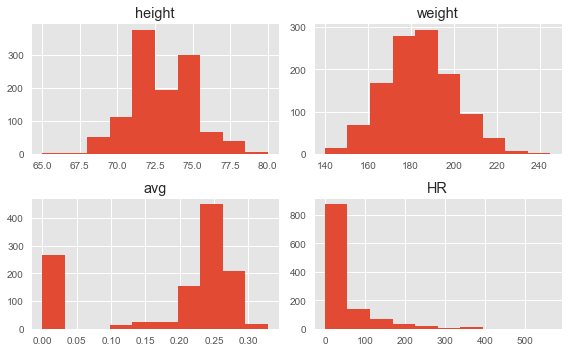

In [8]:
# Histograms of columns.
fig = plt.figure(figsize=(8,5))
for i,key in enumerate(baseball.keys()[2:]):
    ax = fig.add_subplot(2,2,i+1)
    ax.set_title(key)
    baseball[key].hist(bins=10)
plt.tight_layout()
plt.show()

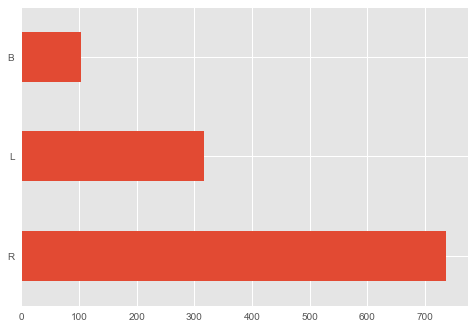

In [9]:
# count of players based on handedness
baseball['handedness'].value_counts().plot.barh()
plt.show()

In [10]:
bball_B = baseball[baseball['handedness']=='B']
bball_R = baseball[baseball['handedness']=='R']
bball_L = baseball[baseball['handedness']=='L']
# plt.show()

# Paired Plots and Bivariate Exploration of dataset

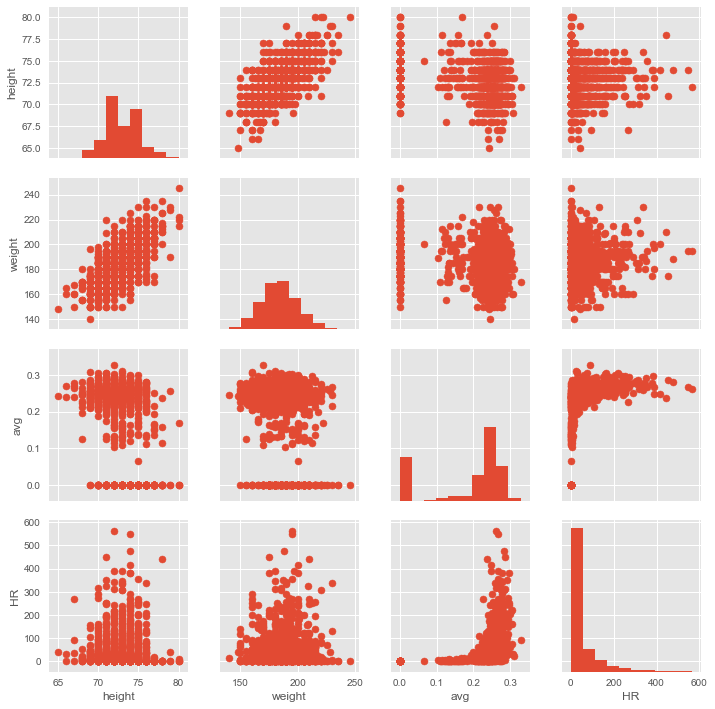

In [11]:
# Paired Plots
# baseball[(baseball["avg"]==0)&(baseball["HR"]==0)]
g = sns.PairGrid(baseball)
g = g.map_diag(plt.hist)
g = g.map_offdiag(plt.scatter)
plt.show()

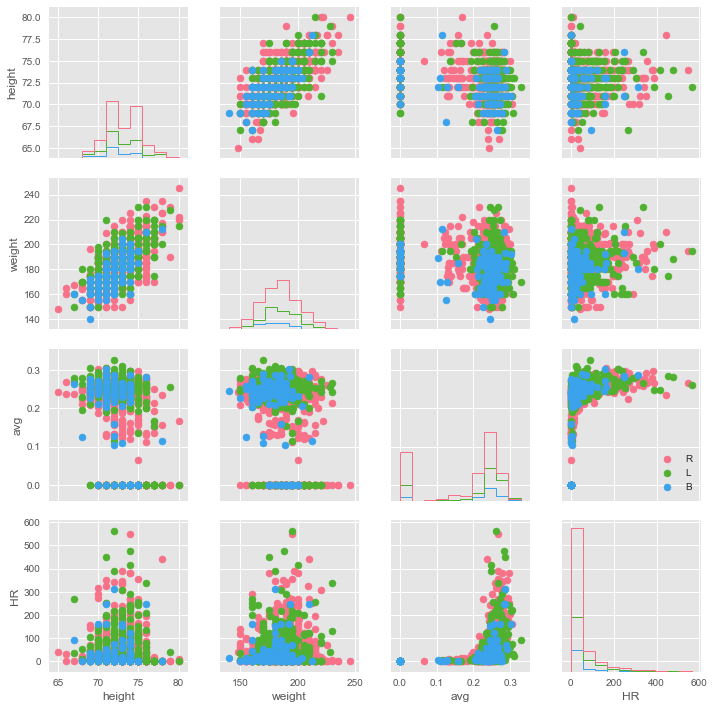

In [15]:
# Paired Plots by group
g = sns.PairGrid(baseball, hue = "handedness", palette='husl')
g = g.map_diag(plt.hist,histtype="step", linewidth=1)
g = g.map_offdiag(plt.scatter)
plt.legend()
plt.show()


## Based on `Handedness`

Median `Height` and `weight` do not vary significantly based on handedness of the player. `avg` and `HR` is slightly higher for Left handed players.

### Height

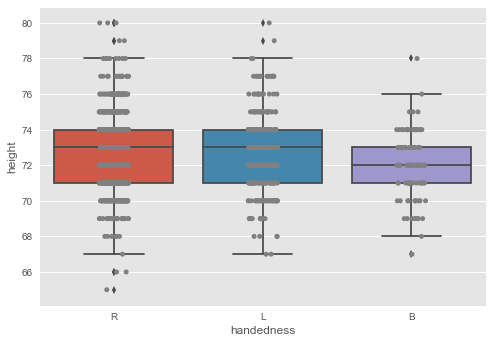

In [16]:
# Height based on handedness
sns.boxplot(y = 'height', x='handedness', data = baseball)
sns.stripplot(y = 'height', x='handedness', data = baseball, color='gray', jitter=True)
plt.show()

### Weight

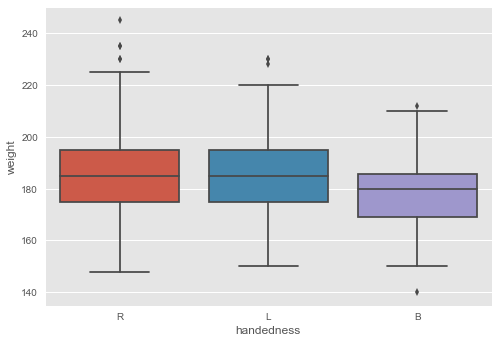

In [17]:
# Weight based on handedness
plt.figure()
sns.boxplot(y = 'weight', x='handedness', data = baseball)
plt.show()

### Avg

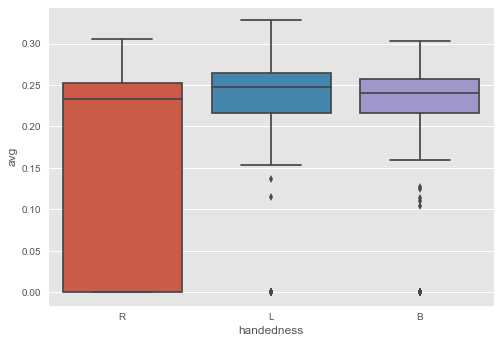

In [18]:
# avg based on handedness
sns.boxplot(y = 'avg', x='handedness', data = baseball)
plt.show()

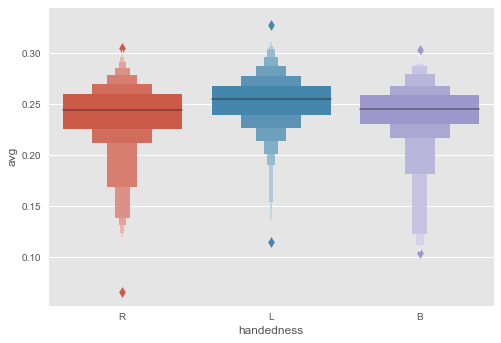

In [19]:
# avg based on handedness with avg>0
sns.lvplot(y = 'avg', x='handedness', data = baseball[baseball['avg']!=0])
plt.show()

### HR

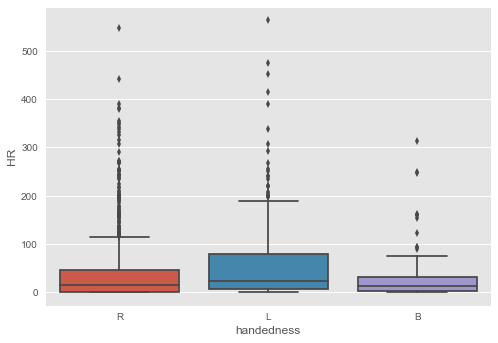

In [20]:
# HR based on handedness
plt.figure()
sns.boxplot(y = 'HR', x='handedness', data = baseball)
plt.show()

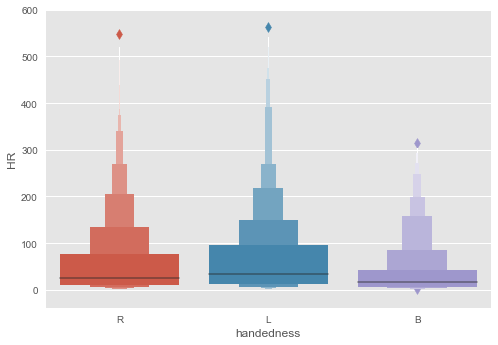

In [21]:
# HR based on handedness with HR >0
plt.figure()
sns.lvplot(y = 'HR', x='handedness', \
            data = baseball[baseball['HR']!=0])
plt.show()

In [48]:
bball_median=baseball.groupby('handedness').median()
bball_median["Count"]=baseball.groupby('handedness')["name"].count()

In [50]:
bball_median.to_csv("baseball_median.csv")
bball_median

height  weight     avg    HR  Count
handedness                                     
B             72.0   180.0  0.2405  13.0    104
L             73.0   185.0  0.2480  23.5    316
R             73.0   185.0  0.2330  14.0    737

## Based on `weight`

Exploring the difference in average and home run based on three levels of weight - Low(`L`) Medium(`M`) and High(`H`).

In [22]:
pd.qcut(baseball['weight'], q=3, labels=['Low','Medium','High'])\
        .cat.reorder_categories(['Low','Medium','High'],ordered=True)\
        .value_counts()

Medium    420
Low       395
High      342
dtype: int64

In [23]:
# Defining a new dataframe with height and weight categorized
baseball_new = baseball.copy(deep=True)
baseball_new['weight_cat'] = \
    pd.qcut(baseball_new['weight'], q=3, labels=['Low','Medium','High'])\
    .cat.reorder_categories(['Low','Medium','High'],ordered=True)
baseball_new['height_cat'] = \
    pd.qcut(baseball_new['height'], q=3, labels=['Low','Medium','High'])\
    .cat.reorder_categories(['Low','Medium','High'],ordered=True)
baseball_new.head(5)

name handedness  height  weight    avg   HR weight_cat height_cat
0       Tom Brown          R      73     170  0.000    0        Low     Medium
1  Denny Lemaster          R      73     182  0.130    4     Medium     Medium
2       Joe Nolan          L      71     175  0.263   27        Low        Low
3     Denny Doyle          L      69     175  0.250   16        Low        Low
4   Jose Cardenal          R      70     150  0.275  138        Low        Low

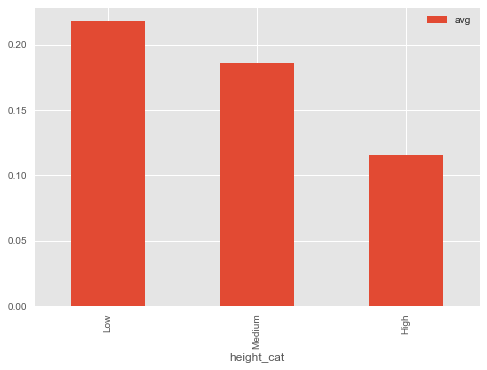

In [24]:
# Mean avg based on weight category
baseball_new.groupby('height_cat').mean()[['avg']].plot(kind='bar')
plt.show()

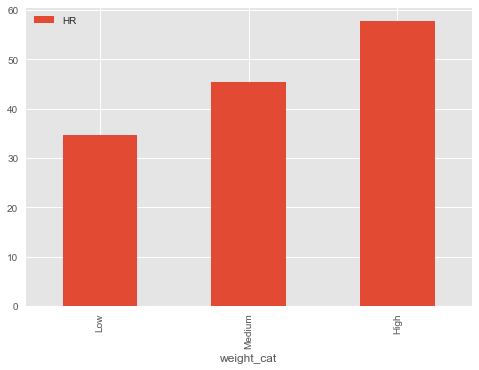

In [25]:
# Mean HR based on weight category
baseball_new.groupby('weight_cat').mean()[['HR']].plot(kind='bar')
plt.show()

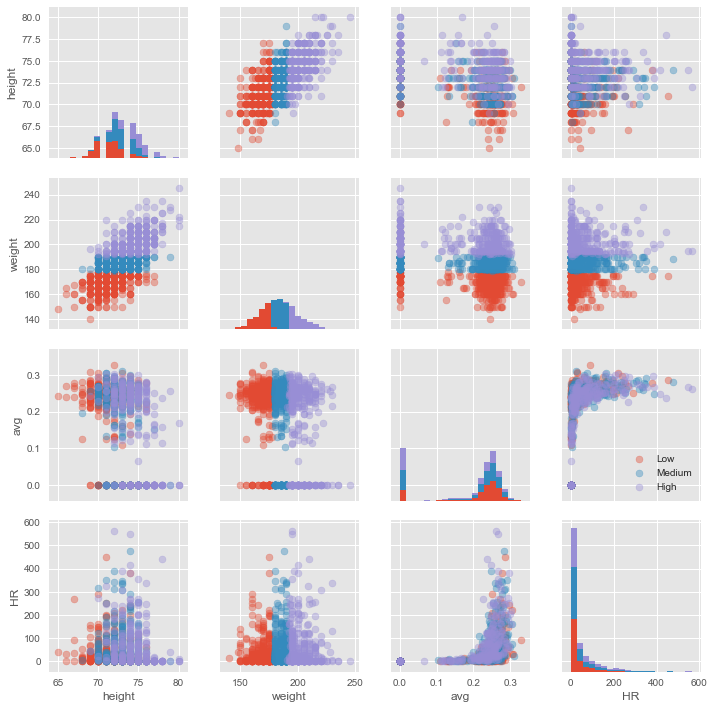

In [63]:
# Paired Plots by group
g = sns.PairGrid(baseball_new, hue = "weight_cat")
g = g.map_diag(plt.hist,bins=20)
g = g.map_offdiag(plt.scatter,alpha=0.4)
# g = g.map_lower(plt.hexbin,gridsize=100)
plt.legend()
plt.show()

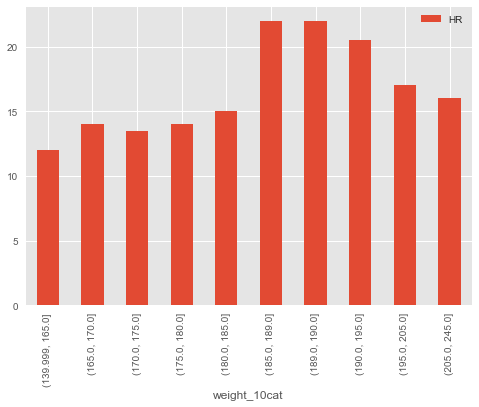

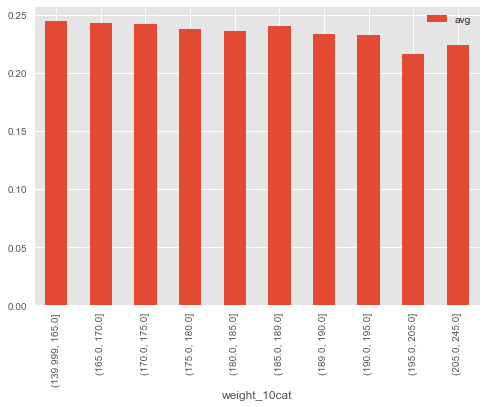

In [59]:
# Seperating into 10 Categories of weight
baseball_new['weight_10cat'] = pd.qcut(baseball['weight'], q=10)
baseball_new.groupby('weight_10cat').median()[['HR']].plot(kind='bar')
plt.show()
baseball_new.groupby('weight_10cat').median()[['avg']].plot(kind='bar')
plt.show()

### `HR` vs. `avg` filtered by `weight_cat`

            height  weight     avg    HR
weight_cat                              
Low           71.0   170.0  0.2440  13.0
Medium        73.0   185.0  0.2365  17.0
High          74.0   200.0  0.2270  19.5


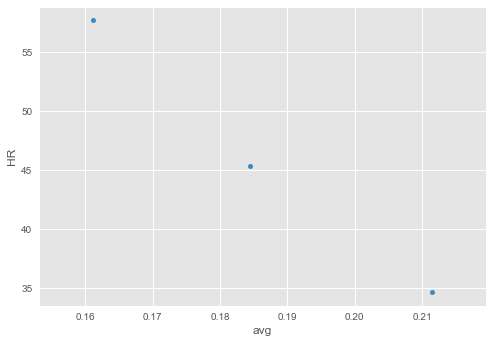

In [27]:
print(baseball_new.groupby('weight_cat').median())
baseball_new.groupby('weight_cat').mean().plot(x='avg',y='HR',kind='scatter', legend=True)
plt.show()

## Based on `height`

In [310]:
bb_height_avg

height      weight       avg         HR
height_cat                                            
Low         70.950730  175.930657  0.217894  41.607664
Medium      73.481283  187.465241  0.186217  55.866310
High        75.812766  199.829787  0.115187  37.387234

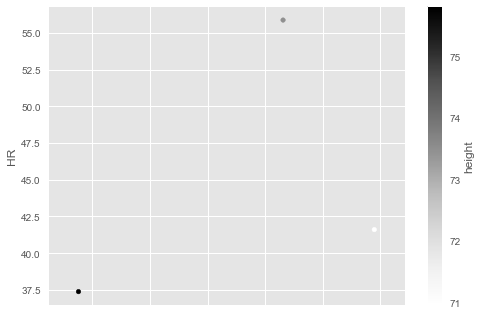

In [316]:
baseball_new.groupby('height_cat').mean().plot(x='avg',y='HR',\
                            c='height',kind='scatter', legend=True)
plt.show()

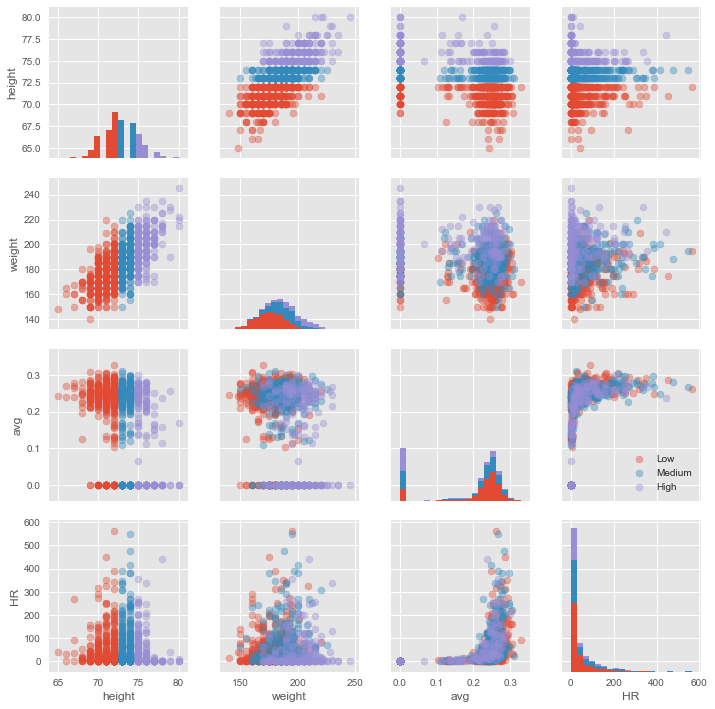

In [284]:
# Paired Plots by group
g = sns.PairGrid(baseball_new, hue = "height_cat")
g = g.map_diag(plt.hist,bins=20)
g = g.map_offdiag(plt.scatter,alpha=0.4)
plt.legend()
plt.show()

## Home Run vs. Average

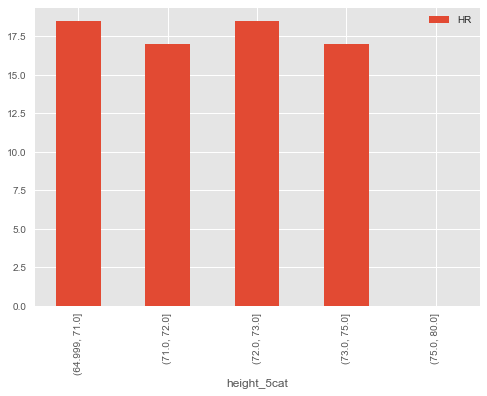

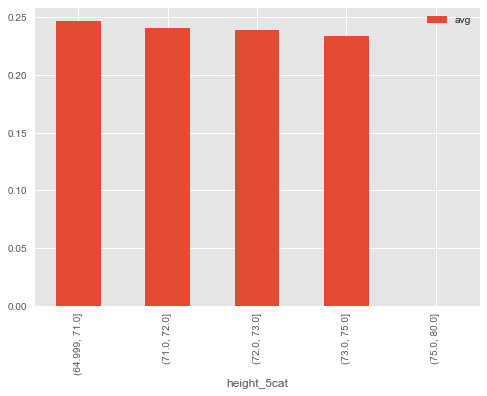

In [61]:
# Seperating into 10 Categories of weight
baseball_new['height_5cat'] = pd.qcut(baseball['height'], q=5)
baseball_new.groupby('height_5cat').median()[['HR']].plot(kind='bar')
plt.show()
baseball_new.groupby('height_5cat').median()[['avg']].plot(kind='bar')
plt.show()

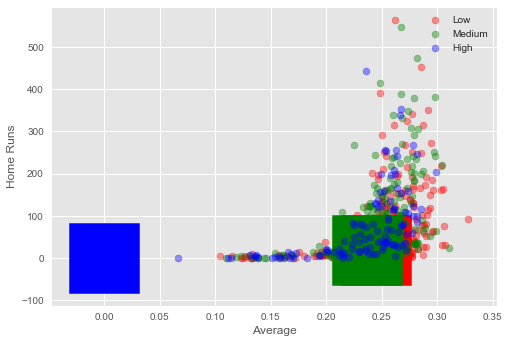

In [397]:
def plot_bball_cat(bball,_cat):
    COLORMAP ='rgbyo'
    for i,l in enumerate(["Low","Medium","High"]):
        d=bball[bball[_cat]==l]
#         print(bball)
        plt.scatter(x = d["avg"],y=d["HR"],alpha=0.4, label = l, color = COLORMAP[i])
        plt.scatter(x = d["avg"].median(),y=d["HR"].median(),s=5000,\
                    color = COLORMAP[i], marker ='s')
        
    plt.xlabel("Average")
    plt.ylabel("Home Runs")
    plt.legend()
    plt.show()
plot_bball_cat(baseball_new,'height_cat')

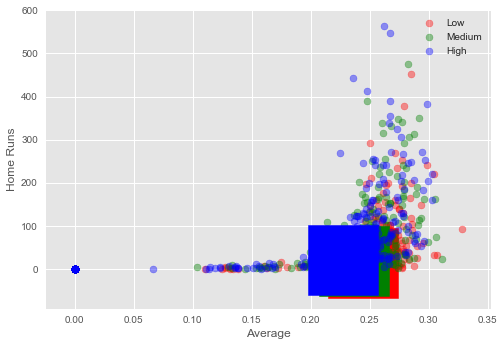

In [398]:
plot_bball_cat(baseball_new,'weight_cat')

## Dumping Data Frame to csv

In [329]:
baseball_new.to_csv('baseball_data_modified')